# K-MEANS

In [152]:
import torch
import matplotlib.pyplot as plt

torch.Size([1000, 2])

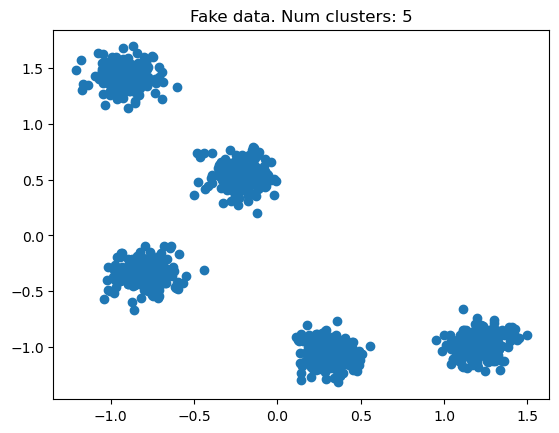

In [153]:
def generate_fake_data(n_clusters, n_dimensions, total_samples, plot):
    means = torch.randn((n_clusters, n_dimensions)) 
    num_samples_per_cluster = total_samples // n_clusters
    data = None
    for mean in means:
        samples = torch.randn((num_samples_per_cluster, n_dimensions)) * 0.1 + mean
        data = samples if data is None else torch.cat((data, samples))    
    if plot:
        plt.scatter(data[:,0], data[:,1])
        plt.title(f'Fake data. Num clusters: {n_clusters}')
    return data
data = generate_fake_data(n_clusters=5, n_dimensions=2, total_samples=1000, plot=True)
data.shape

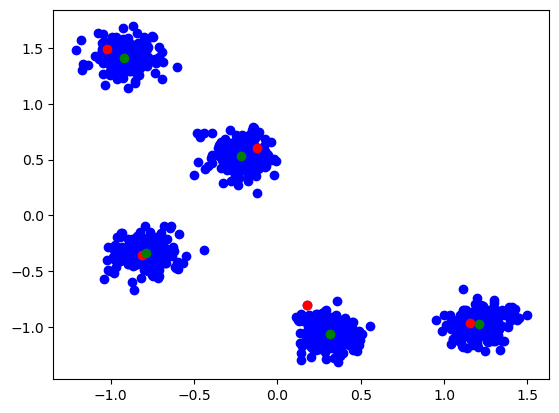

In [154]:
import numpy as np

def kmeans(samples, num_centroids, num_iters, plot):
    num_samples, num_dims = samples.shape

    def compute_distance(samples, means):
        return (torch.sum(samples**2, dim=1, keepdim=True) 
                + torch.sum(means**2, dim=1)
                - 2 * torch.matmul(samples, means.T))
    
    # kmeans++ initial clusters
    means = torch.zeros((num_centroids, num_dims))
    means[0] = samples[np.random.randint(0, num_samples)]
    distances = compute_distance(samples, means[0].unsqueeze(0))
    for i in range(1, num_centroids):
        probs = distances ** 2
        probs /= probs.sum()
        probs = probs.flatten().cpu().numpy()  
        next_centroid_idx = np.random.choice(num_samples, p=probs)
        means[i] = samples[next_centroid_idx]
        new_distances = compute_distance(samples, means[i].unsqueeze(0))
        distances = torch.minimum(distances, new_distances)
    
    if plot: means_init = means.clone()
    
    # Run kmeans for num_iters
    for step in range(num_iters):
        distances = compute_distance(samples, means)
        mean_idxs = torch.argmin(distances, dim=1)
        mean_idxs_one_hot = torch.nn.functional.one_hot(mean_idxs, num_centroids).to(samples.dtype)
        means = mean_idxs_one_hot.T @ samples / mean_idxs_one_hot.sum(dim=0, keepdim=True).T
        
    if plot:
        plt.scatter(data[:,0], data[:,1], c='blue')
        plt.scatter(means_init[:,0], means_init[:,1], c='red')
        plt.scatter(means[:,0], means[:,1], c='green')
        plt.show()
        
kmeans(samples=data, num_centroids=5, num_iters=1, plot=True)